<a href="https://colab.research.google.com/github/engineerinvestor/Portfolio-Analysis/blob/main/Tutorials/Portfolio_Analysis_Using_QuantStats_and_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Analysis Using QuantStats and yfinance

Name: Engineer Investor ([@egr_investor](https://twitter.com/egr_investor))

Date: 05/30/2024


## Summary

In this tutorial, we will perform portfolio analysis using the QuantStats and yfinance libraries in Python. We'll fetch historical stock data using yfinance, create a portfolio, and analyze its performance with QuantStats.

## Introduction
Portfolio analysis is a critical aspect of financial management, involving the evaluation of the performance and risk associated with a collection of investments. This analysis helps investors understand how well their portfolio is performing, identify potential areas for improvement, and make informed decisions to optimize returns while managing risk. In this tutorial, we will leverage two powerful Python libraries, yfinance and QuantStats, to perform a comprehensive portfolio analysis.

**yfinance** is a popular library used to fetch historical market data from Yahoo Finance. It simplifies the process of accessing stock data, making it easier for investors and analysts to obtain the information needed for financial analysis.

**QuantStats** is a Python library designed for portfolio performance evaluation and risk analysis. It provides an extensive set of tools for generating detailed performance reports, visualizing cumulative returns, calculating various risk metrics, and more. QuantStats helps investors gain deeper insights into their portfolio's performance and understand the associated risks.

By the end of this tutorial, you will be able to:
1. Fetch historical stock data using yfinance.
2. Calculate daily returns for individual stocks.
3. Construct a portfolio and calculate its overall returns.
4. Analyze the portfolio's performance using QuantStats.
5. Visualize portfolio performance metrics and generate detailed reports.

This tutorial assumes a basic understanding of Python and financial concepts. If you're new to these topics, don't worry; we'll walk you through each step with detailed explanations and code examples.

### Step-by-Step Guide
Let's dive into the detailed steps to perform portfolio analysis using QuantStats and yfinance. We'll cover everything from data fetching to performance visualization, ensuring you have a solid foundation for analyzing your investment portfolio.

1. **Import Libraries**: We start by importing the essential libraries for our analysis.
2. **Fetch Historical Data**: Using yfinance, we'll retrieve historical stock data for selected tickers.
3. **Calculate Daily Returns**: We'll compute the daily returns for each stock in our dataset.
4. **Create Portfolio Returns**: We'll assume an equal-weighted portfolio and calculate its overall returns.
5. **Analyze the Portfolio Using QuantStats**: We'll leverage QuantStats to generate a detailed performance report.
6. **Visualize the Portfolio Performance**: We'll create visualizations to better understand the portfolio's cumulative returns.
7. **Save the QuantStats Report**: We'll save the detailed report to an HTML file for future reference.

Let's get started with the first step: importing the necessary libraries.

## Prerequisites
Make sure you have the following libraries installed:

In [1]:
!pip install yfinance quantstats pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00


## Step 1: Import Libraries
First, we need to import the necessary libraries.

In [9]:
import yfinance as yf
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Fetch Historical Data
We'll fetch historical stock data for a few tickers using yfinance.

In [10]:
# Define the tickers and the time period
tickers = ['QMOM', 'IMOM', 'QVAL', 'IVAL']
start_date = '2016-01-01'
end_date = '2024-05-01'

# Fetch the historical data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
print(data.head())

[*********************100%%**********************]  4 of 4 completed

Ticker           IMOM       IVAL       QMOM       QVAL
Date                                                  
2016-01-04  21.643637  17.823982  22.150574  19.407246
2016-01-05  21.574516  17.651524  22.276377  19.389742
2016-01-06  21.202986  17.261600  22.015099  18.907625
2016-01-07  20.961065  16.946661  21.511894  18.716002
2016-01-08  20.943789  16.864180  21.144173  18.115761


## Step 3: Calculate Daily Returns
Next, we calculate the daily returns for each stock.

In [11]:
# Calculate daily returns
returns = data.pct_change().dropna()
print(returns.head())

Ticker          IMOM      IVAL      QMOM      QVAL
Date                                              
2016-01-05 -0.003194 -0.009676  0.005679 -0.000902
2016-01-06 -0.017221 -0.022090 -0.011729 -0.024865
2016-01-07 -0.011410 -0.018245 -0.022857 -0.010135
2016-01-08 -0.000824 -0.004867 -0.017094 -0.032071
2016-01-11 -0.005776  0.005291 -0.009154 -0.011302


## Step 4: Create Portfolio Returns
Assume an equal weight portfolio for simplicity.

In [12]:
# Assign equal weights to each stock
weights = [1/len(tickers)] * len(tickers)

# Calculate portfolio returns
portfolio_returns = returns.dot(weights)
print(portfolio_returns.head())

Date
2016-01-05   -0.002023
2016-01-06   -0.018976
2016-01-07   -0.015662
2016-01-08   -0.013714
2016-01-11   -0.005235
dtype: float64


## Step 5: Analyze the Portfolio Using QuantStats
Now, we use QuantStats to analyze the portfolio's performance.

[Performance Metrics]



                           Strategy
-------------------------  ----------
Start Period               2016-01-05
End Period                 2024-04-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          88.98%
CAGR﹪                     5.42%

Sharpe                     0.49
Prob. Sharpe Ratio         91.9%
Smart Sharpe               0.48
Sortino                    0.67
Smart Sortino              0.65
Sortino/√2                 0.47
Smart Sortino/√2           0.46
Omega                      1.1

Max Drawdown               -42.56%
Longest DD Days            1068
Volatility (ann.)          19.47%
Calmar                     0.13
Skew                       -0.75
Kurtosis                   12.19

Expected Daily %           0.03%
Expected Monthly %         0.64%
Expected Yearly %          7.33%
Kelly Criterion            4.75%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.98%
Expected Shortfall (cVaR)  -1.98%

Max Consecutive Wins      

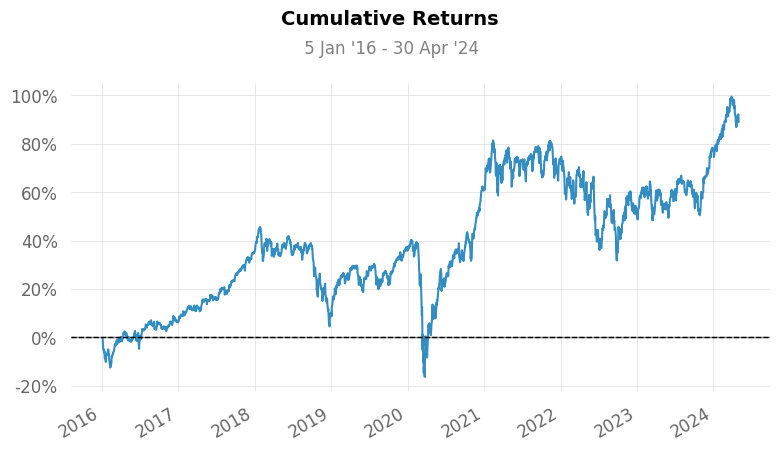

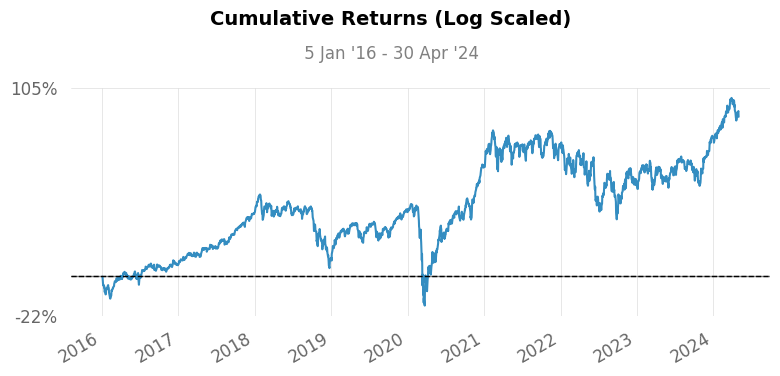

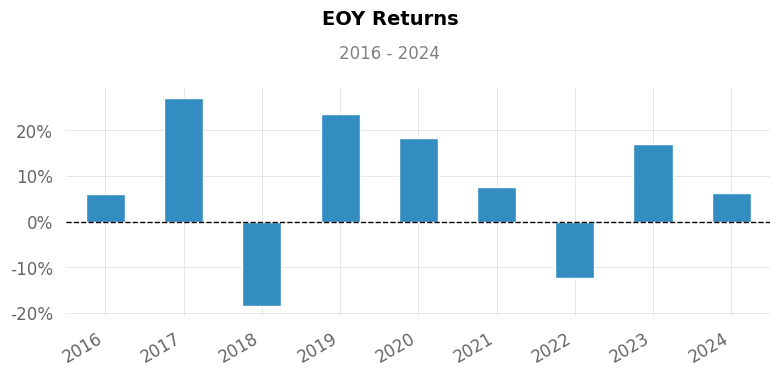

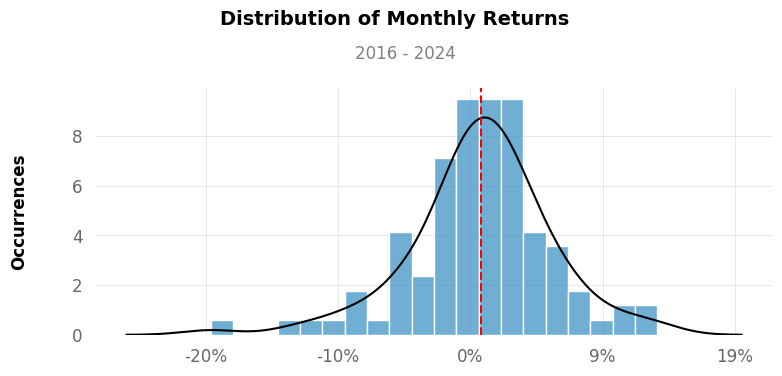

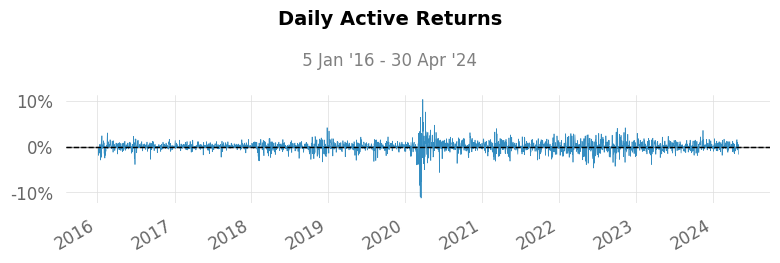

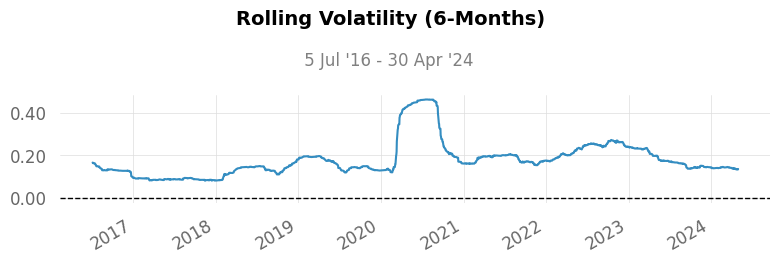

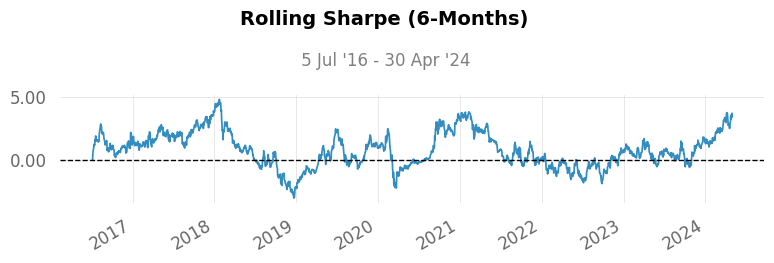

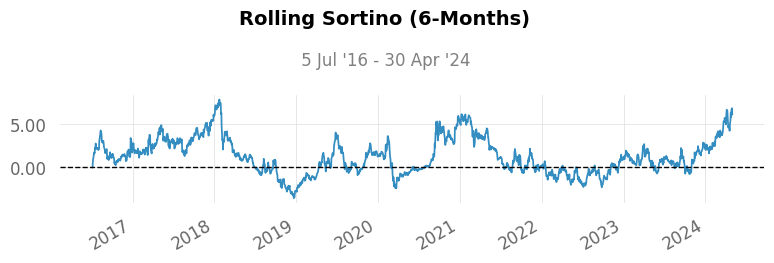

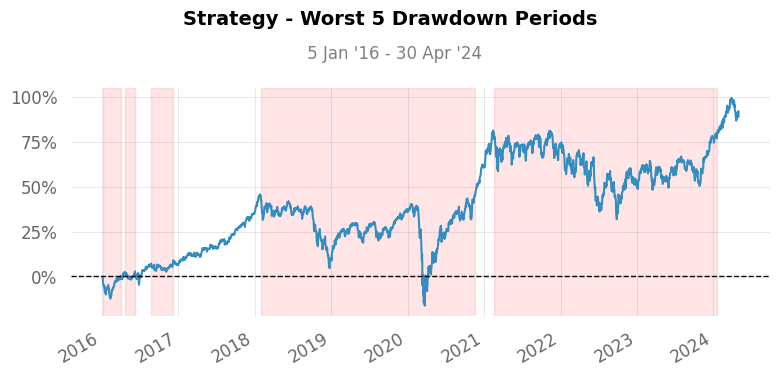

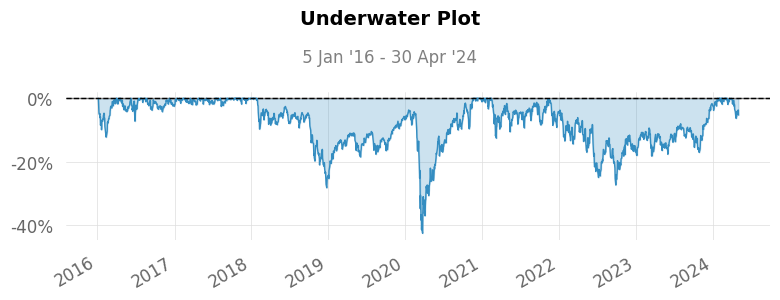

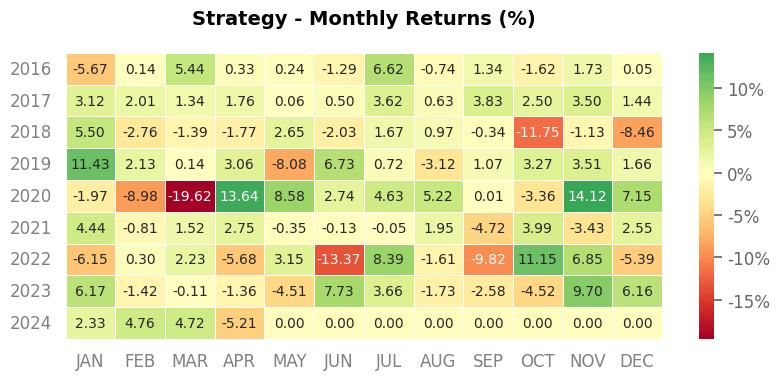

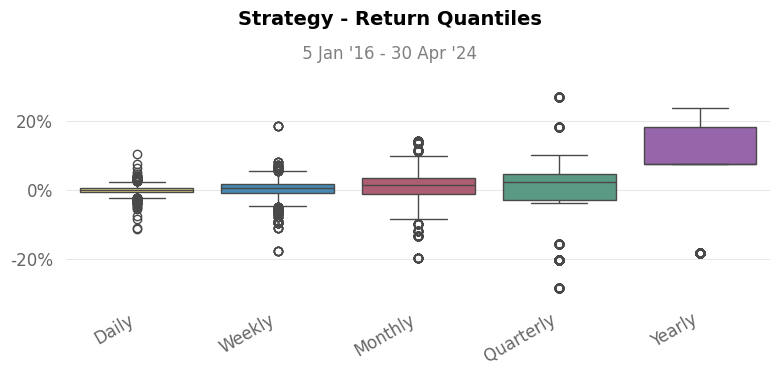

In [13]:
# Convert portfolio returns to a Pandas Series
portfolio_returns = pd.Series(portfolio_returns, name="Portfolio")

# Generate a full report
qs.reports.full(portfolio_returns)

This will open a web browser with a detailed analysis of your portfolio, including performance metrics, return and risk metrics, monthly returns, and more.

## Step 6: Visualize the Portfolio Performance
Let's visualize the cumulative returns of the portfolio.

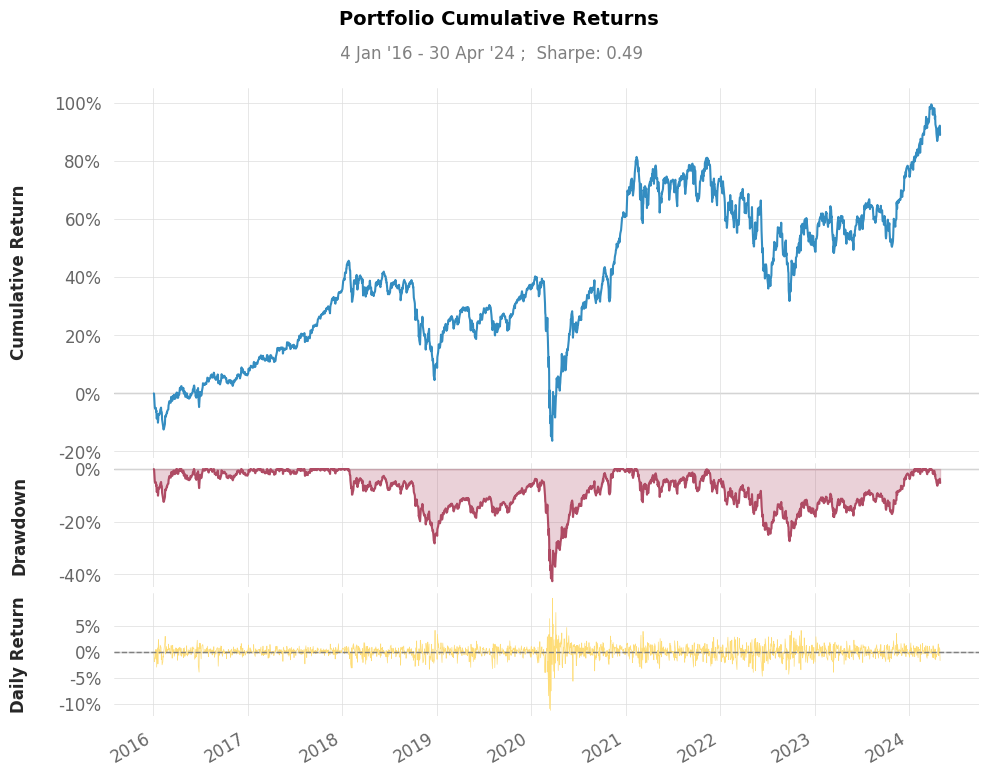

In [7]:
# Plot cumulative returns
qs.plots.snapshot(portfolio_returns, title='Portfolio Cumulative Returns')
plt.show()

## Step 7: Save the QuantStats Report
You can also save the QuantStats report to an HTML file.

In [8]:
# Save the report to an HTML file
qs.reports.html(portfolio_returns, output='portfolio_report.html')

##Conclusion

In this tutorial, we fetched historical stock data using yfinance, created a portfolio, and analyzed its performance using QuantStats. This is a basic introduction to portfolio analysis in Python. You can further customize and expand this analysis based on your requirements.